#      ANN MODEL FOR PREDICTION OF BUBBLE POINT
#                          PRESSURE OF CRUDE OILS

In [ ]:
## ALL LIBRARIES USED HERE

In [48]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [ ]:
# ---------------EXCEL DATA---------------

In [17]:
data = pd.read_excel('Simulation Data (1).xlsx')

In [18]:
data.head()

,GOR,Oil gravity,Gas gravity,T,Pb,Bob
0,1507,0.951,39.3,225,3573.0,1.875
1,898,0.802,32.7,175,3571.0,1.471
2,898,0.802,32.7,150,3426.0,1.451
3,1579,0.930,42.8,235,3405.0,1.997
4,825,0.779,34.2,185,3354.0,1.431


In [1]:
#----------------   SPLIT DATA FOR TRAIN AND TEST ----------------

In [21]:
X_train, X_test, y_train, y_test =train_test_split(data[['GOR', 'Oil gravity', 'Gas gravity', 'T']], data.Pb)
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [24]:
# reshape no matter how many col it became 1
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [15]:
X_test.shape

(64, 4)

In [12]:
tf.reset_default_graph()

X=tf.placeholder(dtype=tf.float32, shape=(None,4), name='X' )
y=tf.placeholder(dtype=tf.float32, shape=(None,1), name='y' )

# setup hidden layer. data, neuron act func name
h1=tf.layers.dense(X,8, activation=tf.nn.relu, name='hidden1')

# output layer

output=tf.layers.dense(h1, 1, activation=None, name='output')

loss=tf.losses.mean_squared_error(y, output)
optimizer=tf.train.AdamOptimizer(.01)

training_run=optimizer.minimize(loss)

In [ ]:
#---------- ITERATED 50 EPOCH ----------------

In [26]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)

epoch 0 train loss 4388963.5 test loss 4397765.0
epoch 1 train loss 4388692.5 test loss 4397495.0
epoch 2 train loss 4388427.5 test loss 4397229.0
epoch 3 train loss 4388164.0 test loss 4396966.0
epoch 4 train loss 4387904.5 test loss 4396704.0
epoch 5 train loss 4387647.0 test loss 4396446.0
epoch 6 train loss 4387394.5 test loss 4396190.0
epoch 7 train loss 4387142.0 test loss 4395933.0
epoch 8 train loss 4386890.0 test loss 4395675.0
epoch 9 train loss 4386637.0 test loss 4395416.0
epoch 10 train loss 4386382.0 test loss 4395155.0
epoch 11 train loss 4386124.0 test loss 4394893.0
epoch 12 train loss 4385863.0 test loss 4394628.0
epoch 13 train loss 4385597.5 test loss 4394360.0
epoch 14 train loss 4385327.5 test loss 4394089.5
epoch 15 train loss 4385054.0 test loss 4393818.0
epoch 16 train loss 4384776.0 test loss 4393543.0
epoch 17 train loss 4384494.5 test loss 4393263.0
epoch 18 train loss 4384207.5 test loss 4392977.0
epoch 19 train loss 4383913.5 test loss 4392685.5
epoch 20 t

In [2]:
#-----------5000 epoch iteration ---------------

In [36]:
init = tf.global_variables_initializer()

train_errs = []
test_errs = []
with tf.Session() as sess:
    init.run()
    
    for epoch in range(5000):
        # training is here
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        # Calculate train loss
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_errs.append(train_loss)
        
        # Calculate test loss
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_errs.append(test_loss)
        
        # Print losses
        if epoch %10==0:
            print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)
    pred = sess.run(output, feed_dict={X: X_test})

epoch 0 train loss 4390502.0 test loss 4399422.0
epoch 10 train loss 4387767.0 test loss 4396779.0
epoch 20 train loss 4385085.5 test loss 4394196.0
epoch 30 train loss 4382127.0 test loss 4391328.0
epoch 40 train loss 4378543.0 test loss 4387844.5
epoch 50 train loss 4374052.5 test loss 4383474.0
epoch 60 train loss 4368535.5 test loss 4378070.0
epoch 70 train loss 4361903.0 test loss 4371526.0
epoch 80 train loss 4354100.0 test loss 4363815.0
epoch 90 train loss 4345090.0 test loss 4354881.0
epoch 100 train loss 4334840.0 test loss 4344701.0
epoch 110 train loss 4323328.5 test loss 4333265.5
epoch 120 train loss 4310547.0 test loss 4320555.5
epoch 130 train loss 4296446.0 test loss 4306536.0
epoch 140 train loss 4280938.5 test loss 4291091.0
epoch 150 train loss 4263824.0 test loss 4274016.0
epoch 160 train loss 4244774.5 test loss 4255029.0
epoch 170 train loss 4223383.0 test loss 4233829.5
epoch 180 train loss 4199724.0 test loss 4210358.0
epoch 190 train loss 4174018.2 test loss 4

epoch 1740 train loss 373858.4 test loss 361677.38
epoch 1750 train loss 372355.44 test loss 360943.88
epoch 1760 train loss 370876.3 test loss 360218.1
epoch 1770 train loss 369401.06 test loss 359493.5
epoch 1780 train loss 367906.06 test loss 358755.44
epoch 1790 train loss 366408.0 test loss 357981.03
epoch 1800 train loss 364925.12 test loss 357205.66
epoch 1810 train loss 363460.94 test loss 356431.4
epoch 1820 train loss 362016.34 test loss 355636.5
epoch 1830 train loss 360584.25 test loss 354843.44
epoch 1840 train loss 359160.25 test loss 354047.2
epoch 1850 train loss 357752.28 test loss 353252.44
epoch 1860 train loss 356351.78 test loss 352458.0
epoch 1870 train loss 354926.16 test loss 351649.7
epoch 1880 train loss 353488.28 test loss 350826.06
epoch 1890 train loss 352059.78 test loss 349999.5
epoch 1900 train loss 350645.62 test loss 349151.06
epoch 1910 train loss 349247.28 test loss 348304.2
epoch 1920 train loss 347864.88 test loss 347460.06
epoch 1930 train loss 34

epoch 3450 train loss 128363.68 test loss 172046.2
epoch 3460 train loss 127991.56 test loss 171614.88
epoch 3470 train loss 127631.61 test loss 171199.1
epoch 3480 train loss 127282.875 test loss 170772.28
epoch 3490 train loss 126946.73 test loss 170366.19
epoch 3500 train loss 126620.75 test loss 169977.66
epoch 3510 train loss 126302.78 test loss 169601.25
epoch 3520 train loss 125989.234 test loss 169222.36
epoch 3530 train loss 125686.14 test loss 168855.39
epoch 3540 train loss 125397.26 test loss 168503.31
epoch 3550 train loss 125117.17 test loss 168164.38
epoch 3560 train loss 124841.84 test loss 167835.66
epoch 3570 train loss 124565.43 test loss 167513.34
epoch 3580 train loss 124288.51 test loss 167204.28
epoch 3590 train loss 124002.51 test loss 166893.56
epoch 3600 train loss 123714.086 test loss 166582.08
epoch 3610 train loss 123428.98 test loss 166274.64
epoch 3620 train loss 123139.62 test loss 165976.03
epoch 3630 train loss 122850.17 test loss 165688.94
epoch 3640 

In [37]:
# Evaluate r^2
metrics.r2_score(y_test, pred)

0.8505277889531616

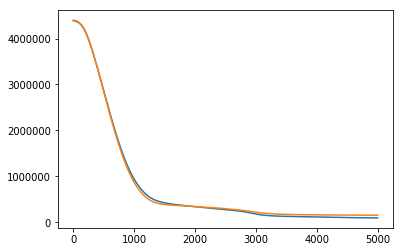

In [38]:
# Plot the learning curves
plt.plot(train_errs, label='Train loss')
plt.plot(test_errs, label="Test loss")

In [39]:
from sklearn.metrics import mean_squared_error

In [3]:


#---------------        Mean Squared Error     ------------------



In [41]:
mean_squared_error(y_test, pred)

152880.94452557064

In [43]:
import numpy as np
np.std(pred)

987.3329

In [44]:
np.std(y_test)

1011.338287535846

In [47]:
np.corrcoef(y_test, pred)[0, 1]

/Users/enkhbat/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/enkhbat/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


nan

In [52]:
output.shape

TensorShape([Dimension(None), Dimension(1)])

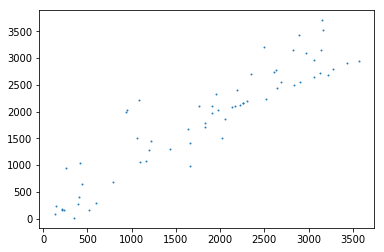

In [55]:

plt.scatter(y_test, pred, alpha=.9, s=1)